In [3]:
from aocd.models import Puzzle

puzzle = Puzzle(year=2018, day=21)

def parses(data):
    ip_reg, *program = data.strip().split("\n")
    ip_reg = int(ip_reg[-1])
    program = [line.split(" ") for line in program]
    program = [(op, [int(i) for i in args]) for op, *args in program]
    return ip_reg, program

data = parses(puzzle.input_data)

In [4]:
from p16 import ops

In [25]:
def simulate(data,init=0):
    ip_reg, program = data
    ip = 0
    N = len(program)
    reg = [init] + [0] * 5
    trace = []
    while ip < N:
#     for i in range(100):
        trace.append(reg.copy())
#         print(f'{ip:02d}', trace[-1])
        opcode, args = program[ip]
        reg[ip_reg] = ip
        ops[opcode](reg, *args)
        if ip == 28:
            print(reg[3])
#             reg[5] = 1<<16+1
        ip = reg[ip_reg] + 1
    return init


In [26]:
trace = simulate(data, 0)

11474091
8219978
9215298
16143370
12054895
14429923
11282294
8519936
643002
15296488
15278410
14182266


KeyboardInterrupt: 

In [ ]:
trace = simulate(data, 0)

11474091
8219978
9215298
16143370
12054895
14429923
11282294
8519936
643002
15296488
15278410
14182266
12738288
5354879
2277397
3760752
12112693
7599421
315685
12659551
8805579
11633402
13670715
12100429
6822485
10819196
4125009
13742849
9371465
13330423
1302429
15117375
15361926
969818
9750815
7649237
10026101
2313278
2060263
14236753
11706514
2714631
1735092
5074262
9874710
11186052
8748284
10355495
9670021
12704437
13778212
11132978
5074169
14086966
9917242
6862374
6441979
1995061
2625549
9873706
11262748
11301648
11732698
9814037
11273238
2556565
5868622
10760169
6882489
16444162
16691106
7062994
5275500
3527398
7572667
13640734
7499609
8093027
8669719
1336518
15116669
9419637
4230423
5814981
11999164
6300240
4510541
7600265
16663028
2698474
6891789
15681531
4926677
2442868
1563625
16519083
9686599
7155604
9670082
15358588
15076791
523655
12582343
11540335
14931159
9019402
6956129
5343344
14769331
9919184
2744791
13024177
10256371
1207919
11395500
8025324
8788481
2815434
6931652
33

In [15]:
def solve_a(data):
    # First part is easy, we can simulate simulate
    # and stop when reaching instrunction pointer = 28
    # returning the contents of the register we compare R0 to
    ip_reg, program = data
    ip = 0
    N = len(program)
    reg = [0] * 6
    while ip < N:
        opcode, args = program[ip]
        reg[ip_reg] = ip
        ops[opcode](reg, *args)
        if ip == 28:
            return reg[args[0]]
        ip = reg[ip_reg] + 1




In [26]:
def solve_b(data):    
    ip_reg, program = data

    A, B, C = program[7][1][0], 0xffffff, 65899
    Rx, Ry, Rz = 0, 0, 0
    
    seen = set()
    last = None

    Rx = 0x10000
    Rz = A
    while True:
        while Rx >= 256:
            Ry = Rx & 0xff
            Rz = (((Rz+Ry) & B) * C) & B
            Rx >>= 8 # /=256, this encapsulates the count loop L17-25
        
        Ry = Rx & 0xff
        Rz = (((Rz+Ry) & B) * C) & B
        if Rz in seen:
            return last
        last = Rz
        seen.add(last)
        Rx = Rz | 0x10000
        Rz = A


In [27]:
solve_a(data)

11474091

In [28]:
solve_b(data)

11474091
8219978
9215298
16143370
12054895
14429923
11282294
8519936
643002
15296488
15278410
14182266
12738288
5354879
2277397
3760752
12112693
7599421
315685
12659551
8805579
11633402
13670715
12100429
6822485
10819196
4125009
13742849
9371465
13330423
1302429
15117375
15361926
969818
9750815
7649237
10026101
2313278
2060263
14236753
11706514
2714631
1735092
5074262
9874710
11186052
8748284
10355495
9670021
12704437
13778212
11132978
5074169
14086966
9917242
6862374
6441979
1995061
2625549
9873706
11262748
11301648
11732698
9814037
11273238
2556565
5868622
10760169
6882489
16444162
16691106
7062994
5275500
3527398
7572667
13640734
7499609
8093027
8669719
1336518
15116669
9419637
4230423
5814981
11999164
6300240
4510541
7600265
16663028
2698474
6891789
15681531
4926677
2442868
1563625
16519083
9686599
7155604
9670082
15358588
15076791
523655
12582343
11540335
14931159
9019402
6956129
5343344
14769331
9919184
2744791
13024177
10256371
1207919
11395500
8025324
8788481
2815434
6931652
33

11153511
13577678
6290964
12682239
13697091
12969300
4646224
11845978
15963790
15088193
12773834
14842784
6641636
13683010
5975106
7002491
9033131
3228897
8763090
12745587
6975469
4379143
4568136
3364483
15664176
15188121
8393512
16411358
5416893
8517863
13974600
8575995
12592805
10653152
9192166
4882803
120347
12883986
869957
1787556
16194891
9129155
948862
1238409
9799193
13555576
3131660
11652362
9099166
10755314
9211881
5367825
1351494
4268192
16349803
10606382
10082260
12102222
5573047
1385373
4632377
11821791
5311238
6606336
15061845
3915265
4212874
5175345
3035744
14734407
13348484
13477795
8275319
11070919
1690797
3294774
16290729
15169369
11548583
16014879
9182370
15700977
3891331
6761154
3477133
6348348
8756397
1989802
11045071
498760
11844929
1705871
6840053
1016704
11843248
5078141
16541330
8599307
13621841
16400530
7392447
14827732
10057757
1452114
1323867
8785251
993835
16686288
4401409
9354805
9535618
12132225
226253
10403603
13915877
7225772
3828066
6216848
7069601
5413

9315944
4704051
14121541
13038246
13606433
7359910
4154098
3587549
9541497
16097077
13614269
11985384
11019918
1744995
11280706
7679950
11895784
5579722
6407312
2990367
4962165
10232263
15437885
4483152
3762735
3995626
13069852
13595135
11461403
7057969
3783550
1430032
4403705
279653
16695354
13267555
9215380
8709792
5240301
3675945
1502205
14512567
6225821
3370787
3451169
1937723
4427337
2476170
3419389
13734970
8108381
508801
11679211
9494927
13719505
14747709
7923674
3527280
3538553
8533296
13872350
14361271
11806128
15987124
6809174
13245285
2976091
3064433
11839162
16641067
10485372
16474231
15591198
1616376
1471292
15863916
3115621
3783262
10634487
6506394
15133406
4188129
1934967
2036682
11226222
9535567
12663544
1454909
16137855
6317944
4193314
3497399
14015217
654580
16502075
12807279
11457994
15608016
5363325
15819080
14116972
5526089
9911988
97415
14718476
6045333
3177532
10767819
2589869
8361480
15090259
14318952
16588758
15006664
2827314
2931315
16533186
7090043
1706407
92

13005596
491420
13941128
3360016
6806686
12056451
5076405
2393515
4971845
12794285
13870857
9946123
14513810
14890299
6925455
15765196
5340605
1016759
12586117
1490102
14407355
11108624
8333132
8886824
15327983
13923954
4169603
9690101
11735907
4946149
9689744
15737835
10422391
5272850
1065598
13914087
9430851
7208109
475138
12551187
2876322
7808714
785649
15678232
14397072
1577527
179594
13229780
13697389
6950315
5306831
545577
8866633
14774923
6629822
4691890
12600514
8377589
11985912
10875184
9952496
7786025
12531238
12020077
1115125
15601397
1402802
883500
5919446
4890861
8071696
15202611
11068743
15437157
8310045
11856609
1848820
2477000
15307074
3323346
9962612
14404787
1213246
7859958
10746813
11751179
4218809
10201613
16444954
16474005
10991135
8297888
11609770
11191503
11158138
6011129
382460
3555320
12811564
12671578
1478435
1628301
11984002
8409055
1346959
7586633
957671
12689446
2788573
2949388
15575468
8009524
9377860
13149545
11554699
11306595
5155198
16498752
14915241
58

11722602
9415318
8963457
15004595
326555
7285755
2763545
10176871
14113583
3387165
1584495
14367029
10781225
13412468
7460083
10426232
16611900
12675485
287155
15872121
7279036
502754
4812806
9819557
2108403
11852263
14758301
14939803
1464616
10523430
1195032
14055765
3978525
3296243
13060749
9719966
12893073
16708285
7846142
3820367
11677881
6671292
15702046
7460279
5469885
2716542
4519768
643614
8072575
9144667
9281243
11928670
9373723
8466574
6456037
1841106
3159828
11085046
6560937
15294846
14014102
15704207
5712930
13322607
3047895
13352659
13488336
15822767
10236911
14560823
6955656
6230947
3020425
490038
11330265
2961980
3112613
5287538
16481487
3796962
14446608
5980863
5941736
723874
1355090
4954786
16682345
10902213
295158
6303385
13092772
8220776
10909479
8180913
6970134
5083614
9182002
16198888
3052673
3272364
16115837
13007574
7841529
15846574
1070289
9957330
15544362
15272861
14391933
14385562
5255920
12491789
5176072
15667520
2992430
5551642
1301435
1602325
3572381
956059

8814229
5989898
4932925
5945661
4983745
15579381
8729526
11599284
4565356
10105916
5120017
5274600
3178550
15150781
16613714
1338318
16097060
8198970
915664
15780951
6911132
15672971
5402284
1489971
6232130
9349299
6665590
728454
12371264
14503004
7096671
8533853
6188263
9539302
7296523
14946908
8632013
11021054
10162071
13634773
11251030
16113824
11568231
11934468
4313484
15869400
16037526
1013455
3969256
13933831
2093825
14463267
9457121
8279923
12955005
13473315
12053934
11426924
784613
5561424
2800819
14769694
7545843
4667493
2161956
16313996
2324917
5920001
13064201
14867440
15415092
16758548
7972240
1928896
4302365
9316552
13265861
8446539
5160398
6344868
11466823
16370082
5637146
14940655
3583119
12470246
11851254
13242262
16479378
5331539
8645134
15226533
4933960
15743922
13253460
14360312
9440223
12839707
4187221
15532264
265863
1273914
6048239
3018589
4819171
543396
4525737
16322048
7903857
4104896
4482023
14635399
7822275
10651385
1946610
7170608
7740921
5789613
12149353
154

6808052
9570562
14922968
9315645
10404489
10087762
13698062
2380553
518301
7517116
12413600
15135673
2369635
7661752
6589559
7834168
10970591
13303639
4966805
6806825
5720141
3970972
4933490
809950
12266860
7309810
5205020
10928741
15924478
1553479
14582
10183909
267660
1298664
11210681
8742539
15238814
11126195
16263497
10729375
12633133
11334950
13588462
7076558
16096877
519212
11369981
10689259
12091740
42656
13274241
964120
12828627
10340401
16531018
6607563
2135050
14774333
3801858
8071098
10108966
217499
16472651
522372
7953201
14606969
9230850
3663199
15569799
3547983
15580709
10633372
4778805
4429765
1612095
1249201
12954731
10360212
13995486
11850022
7799106
4099100
9896661
81886
970796
1391897
11885367
3694975
2734425
10608111
5505725
4864640
5784835
5169737
1228354
5505253
6070790
14318115
2471244
16686376
15373634
9749388
7763670
13052581
565574
15013134
9477550
478394
6160487
147290
9386038
8712191
11915579
14488593
12526742
10984635
8690026
5286598
3390759
1633995
7632002

4520776

In [38]:
r4, r5, r1 = 0,0,0
r3 = 0
A, B, C = 2176960, 16777215, 65899

state = 'reset'

vals = set()
last = None

while True:
    if state == 'reset':
        r4 = r3 | 0x10000
        r3 = A
        state = 'hash'
        continue
    elif state == 'hash':
        r1 = r4 & 0xff
        r3 = (((r3+r1) & B) * C) & B
        if r4 >= 256:
            state = 'to_loop'
            continue
        else:
            state = 'halt'
            continue
    elif state == 'to_loop':
        r1 = 0
        state = 'loop'
        continue
    elif state == 'loop':
        r5 = (r1+1)*256
        if r5 > r4:
            r5 = 1
            r4 = r1
            state = 'hash'
            continue
        else:
            r1 += 1
            continue
    elif state == 'halt':
#         print(r3)
        if r3 in vals:
            raise ValueError()
        last = r3
        vals.add(r3)
        state = 'reset'
        r1 = 0
        continue
# 11474091

ValueError: 

In [39]:
last

4520776

In [31]:
vals

[1,
 175,
 125,
 141,
 247,
 183,
 221,
 173,
 131,
 9,
 233,
 233,
 217,
 195,
 81,
 35,
 57,
 185,
 115,
 5,
 193,
 135,
 177,
 209,
 185,
 105,
 165,
 63,
 209,
 143,
 203,
 19,
 231,
 235,
 15,
 149,
 117,
 153,
 35,
 31,
 217,
 179,
 41,
 27,
 77,
 151,
 171,
 133,
 159,
 147,
 193,
 211,
 169,
 77,
 215,
 151,
 105,
 99,
 31,
 41,
 151,
 171,
 173,
 179,
 149,
 173,
 39,
 89,
 165,
 105,
 251,
 255,
 107,
 81,
 53,
 115,
 209,
 115,
 123,
 133,
 21,
 231,
 143,
 65,
 89,
 183,
 97,
 69,
 115,
 255,
 41,
 105,
 239,
 75,
 37,
 23,
 253,
 147,
 109,
 147,
 235,
 231,
 7,
 191,
 177,
 227,
 137,
 107,
 81,
 225,
 151,
 41,
 199,
 157,
 19,
 173,
 123,
 135,
 43,
 105,
 51,
 109,
 89,
 229,
 61,
 31,
 245,
 99]

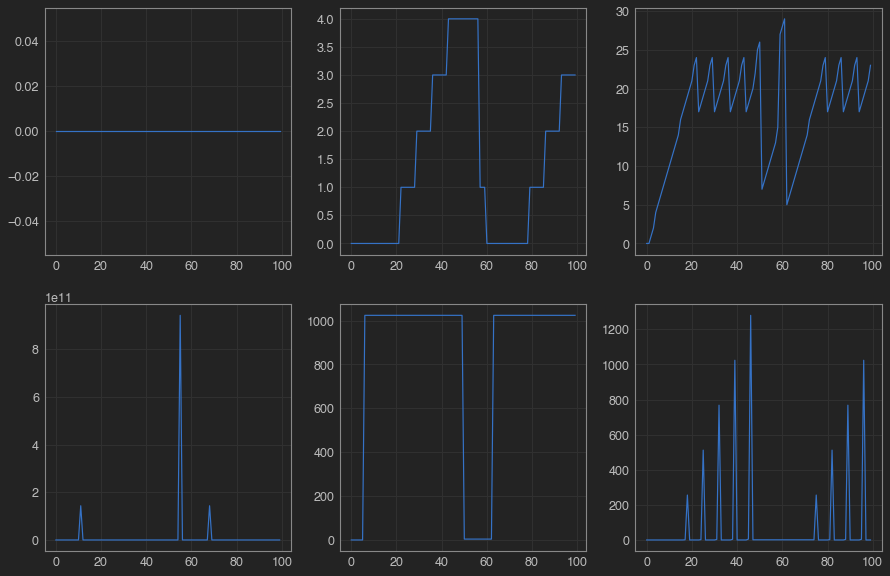

In [56]:
fig, ax = plt.subplots(2,3,figsize=(15,10))

for i, t in enumerate(zip(*trace)):
    ax[divmod(i,3)].plot(t)
    

In [ ]:
17 R1 = 0
18 R5 = R1 + 1
19 R5 *= 256
20 R5 = bool(R5>R4)
21 addr[5, 2, 2]
22 addi[2, 1, 2]
23 seti[25, 7, 2]
24 addi[1, 1, 1]

In [15]:
for i, (op, args) in enumerate(data[1]):
    print(f'{i:02d} {op}{args}')

00 seti[123, 0, 3]
01 bani[3, 456, 3]
02 eqri[3, 72, 3]
03 addr[3, 2, 2]
04 seti[0, 0, 2]
05 seti[0, 6, 3]
06 bori[3, 65536, 4]
07 seti[2176960, 8, 3]
08 bani[4, 255, 1]
09 addr[3, 1, 3]
10 bani[3, 16777215, 3]
11 muli[3, 65899, 3]
12 bani[3, 16777215, 3]
13 gtir[256, 4, 1]
14 addr[1, 2, 2]
15 addi[2, 1, 2]
16 seti[27, 7, 2]
17 seti[0, 9, 1]
18 addi[1, 1, 5]
19 muli[5, 256, 5]
20 gtrr[5, 4, 5]
21 addr[5, 2, 2]
22 addi[2, 1, 2]
23 seti[25, 7, 2]
24 addi[1, 1, 1]
25 seti[17, 2, 2]
26 setr[1, 7, 4]
27 seti[7, 9, 2]
28 eqrr[3, 0, 1]
29 addr[1, 2, 2]
30 seti[5, 9, 2]


In [70]:
data[1]

[('seti', [123, 0, 3]),
 ('bani', [3, 456, 3]),
 ('eqri', [3, 72, 3]),
 ('addr', [3, 2, 2]),
 ('seti', [0, 0, 2]),
 ('seti', [0, 6, 3]),
 ('bori', [3, 65536, 4]),
 ('seti', [2176960, 8, 3]),
 ('bani', [4, 255, 1]),
 ('addr', [3, 1, 3]),
 ('bani', [3, 16777215, 3]),
 ('muli', [3, 65899, 3]),
 ('bani', [3, 16777215, 3]),
 ('gtir', [256, 4, 1]),
 ('addr', [1, 2, 2]),
 ('addi', [2, 1, 2]),
 ('seti', [27, 7, 2]),
 ('seti', [0, 9, 1]),
 ('addi', [1, 1, 5]),
 ('muli', [5, 256, 5]),
 ('gtrr', [5, 4, 5]),
 ('addr', [5, 2, 2]),
 ('addi', [2, 1, 2]),
 ('seti', [25, 7, 2]),
 ('addi', [1, 1, 1]),
 ('seti', [17, 2, 2]),
 ('setr', [1, 7, 4]),
 ('seti', [7, 9, 2]),
 ('eqrr', [3, 0, 1]),
 ('addr', [1, 2, 2]),
 ('seti', [5, 9, 2])]

In [69]:
ip = list(zip(*trace))[2]
c = Counter(ip)
for i in range(31):
    print(f'{i:02}', c[i])

00 2
01 1
02 1
03 0
04 1
05 2
06 2
07 3
08 3
09 3
10 3
11 3
12 3
13 3
14 2
15 1
16 2
17 9
18 9
19 9
20 9
21 8
22 1
23 8
24 7
25 1
26 1
27 1
28 1
29 1
30 0


In [41]:
for i, (op, args) in enumerate(data[1]):
    print(f'{i:02d} {op}{args}')

00 seti[123, 0, 3]
01 bani[3, 456, 3]
02 eqri[3, 72, 3]
03 addr[3, 2, 2]
04 seti[0, 0, 2]
05 seti[0, 6, 3]
06 bori[3, 65536, 4]
07 seti[2176960, 8, 3]
08 bani[4, 255, 1]
09 addr[3, 1, 3]
10 bani[3, 16777215, 3]
11 muli[3, 65899, 3]
12 bani[3, 16777215, 3]
13 gtir[256, 4, 1]
14 addr[1, 2, 2]
15 addi[2, 1, 2]
16 seti[27, 7, 2]
17 seti[0, 9, 1]
18 addi[1, 1, 5]
19 muli[5, 256, 5]
20 gtrr[5, 4, 5]
21 addr[5, 2, 2]
22 addi[2, 1, 2]
23 seti[25, 7, 2]
24 addi[1, 1, 1]
25 seti[17, 2, 2]
26 setr[1, 7, 4]
27 seti[7, 9, 2]
28 eqrr[3, 0, 1]
29 addr[1, 2, 2]
30 seti[5, 9, 2]
